In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import warnings


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve, roc_auc_score



warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
# Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# SVM

# Random forest
# XGBoost
# CATBOOST
 

In [3]:
df = pd.read_csv("d:\\FSDS\\SELF FOLDER\\algerian+forest+fires+dataset\\Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)
df.columns = df.columns.str.strip()

In [4]:
Abbes_df =  df.iloc[124:]
Bejaia_df = df.iloc[0:122]
Abbes_df.reset_index(drop=True,inplace=True)
Abbes_df.dropna(inplace=True)
Abbes_df['region'] = "Abbes"
Bejaia_df['region'] = "Bejaia"


In [5]:
new_df  = pd.concat([Abbes_df,Bejaia_df],ignore_index=True)


In [6]:
x=[]
for i in new_df['Classes']:
    #print(i)
    try:
        x.append(i.strip())
    except:
        i="NA"
        x.append(i)
new_df['Classes'] = x

In [7]:
#--------------------------- Changing the datatype of columns

for i in new_df.columns:
    try:
        new_df[i] = new_df[i].astype('int')
    except:
        try:
            new_df[i] = new_df[i].astype('float')
        except:
            try:
                new_df[i] = new_df[i].astype('str')
            except exception as e:
                print(e)

In [8]:
LEC = LabelEncoder()
for i in new_df.select_dtypes(include = "object").columns:
    new_df[i] = LEC.fit_transform(new_df[i])
    

In [9]:
new_df.drop(columns = ['day','year'],inplace=True)

In [10]:
new_df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
new_df.head(n=10)

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1,0
1,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0
2,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,0
3,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,0
4,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1,0
5,6,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,0,0
6,6,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,0,0
7,6,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,1,0
8,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1,0
9,6,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,0,0


In [12]:
new_df['month'].value_counts(normalize=True)

month
8    0.255144
7    0.251029
6    0.246914
9    0.246914
Name: proportion, dtype: float64

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

transformer = ColumnTransformer(transformers=[('tnf1',StandardScaler(),["RH",'Temperature',"Ws"]),
('tnf2',MinMaxScaler(),["Rain","FFMC","DMC","DC","ISI","BUI","FWI",'month'])

],remainder= 'passthrough',verbose_feature_names_out=False)


In [14]:
new_df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns="Classes")
y = new_df["Classes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [68]:
X_train_unscl, X_test_unscl, y_train_unscl, y_test_unscl = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:

transformer.set_output(transform="pandas")
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [17]:
X_test.head(n=10)

,RH,Temperature,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,month,region
127,-0.574429,0.196864,-0.886556,0.000000,0.884273,0.149007,0.110539,0.372093,0.143939,0.231511,0.000000,1
230,-0.906110,-0.074570,-1.582044,0.000000,0.902077,0.147351,0.122717,0.395349,0.150000,0.247588,1.000000,1
163,1.216652,0.468298,-0.191068,0.000000,0.789318,0.145695,0.141920,0.174419,0.156061,0.109325,0.333333,1
93,0.818634,-1.160305,0.156676,0.000000,0.795252,0.057947,0.081499,0.191860,0.069697,0.080386,1.000000,0
183,-0.508092,0.739732,-1.234300,0.023810,0.732938,0.081126,0.014520,0.098837,0.062121,0.025723,0.666667,1
116,0.155271,-0.617437,-0.538812,0.000000,0.842730,0.250000,0.176112,0.261628,0.234848,0.209003,1.000000,0
30,-0.309083,-1.160305,0.852164,0.130952,0.520772,0.038079,0.007494,0.069767,0.028788,0.016077,0.333333,0
86,-0.574429,1.011166,-0.538812,0.000000,0.925816,1.076159,0.798126,0.581395,1.009091,0.839228,0.666667,0
132,1.216652,-1.703173,1.199908,0.000000,0.821958,0.213576,0.255269,0.279070,0.246970,0.228296,0.000000,1
20,-0.508092,-0.074570,-0.538812,0.000000,0.854599,0.122517,0.053864,0.290698,0.103030,0.157556,0.000000,0


### Logistic Regression

In [18]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9725146198830409


In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9016393442622951

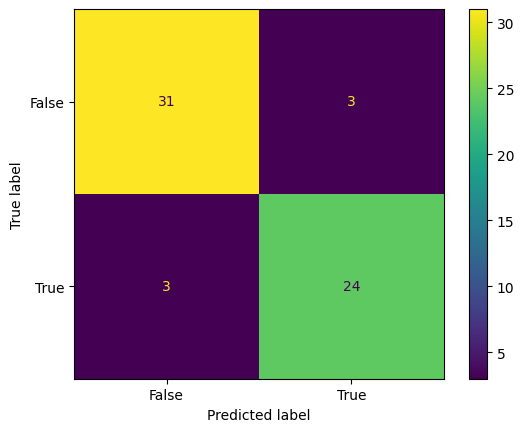

In [20]:
cm1 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

NameError: name 'y_pred_gnb' is not defined

### Naive Bayes Classifier


In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)


GaussianNB()

Model accuracy score: 0.9180


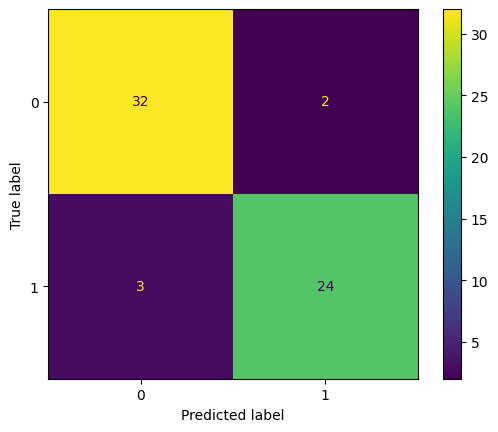

In [23]:
y_pred_gnb = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))

cm1 = confusion_matrix(y_test, y_pred_gnb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = gnb.classes_)
cm_display.plot()
plt.show()

### KNeighborsClassifier

In [24]:
neigh = KNeighborsClassifier()
KNN_params = {
 'leaf_size': np.arange(0,60,20),
 'metric': ['minkowski'],
 'n_neighbors': np.arange(3,10,1),
 'p': [1,2],
 'weights': ['uniform', 'distance']}


In [25]:
KNN_GRID  = GridSearchCV(neigh,param_grid = KNN_params,cv=5)
KNN_GRID.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 0, 20, 40]),
                         'metric': ['minkowski'],
                         'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [36]:
neigh = KNeighborsClassifier()
# 'leaf_size'= 20,'metric'= 'minkowski','n_neighbors'= 8,'p'= 1,'weights'= 'distance'

In [37]:
neigh = neigh.set_params(**KNN_GRID.best_params_)

In [39]:
neigh.fit(X_train,y_train)

y_knn_pred = neigh.predict(X_test)

accuracy_score(y_test,y_knn_pred)

0.8852459016393442

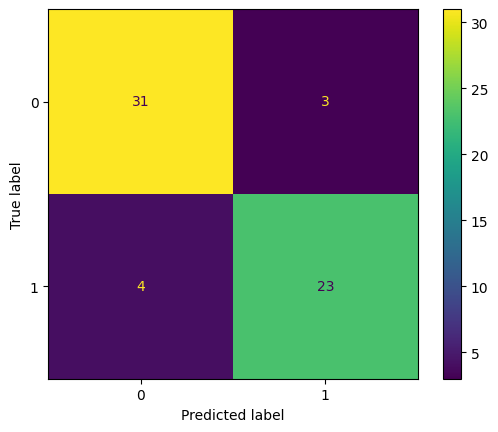

In [43]:
cm3 = confusion_matrix(y_test,y_knn_pred)
cm_display3 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=neigh.classes_)
cm_display3.plot()

### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
DT_params = {
 'criterion': ["gini", "entropy", "log_loss"],
 'max_leaf_nodes': np.arange(0,10,1)}
clf = DecisionTreeClassifier(random_state=0)

In [70]:
DT_GRID = GridSearchCV(clf,param_grid=DT_params,cv=3)
DT_GRID.fit(X_train,y_train)
print("The best parameters are ", DT_GRID.best_params_)
print("THe best score is ", DT_GRID.best_score_)

The best parameters are  {'criterion': 'gini', 'max_leaf_nodes': 4}
THe best score is  0.9945355191256832


In [73]:
clf = clf.set_params(** DT_GRID.best_params_)
clf.fit(X_train,y_train)
y_DT_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_DT_pred))

0.9836065573770492


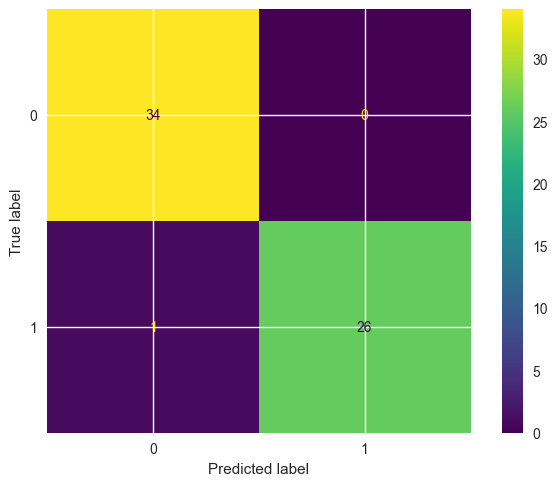

In [74]:
cm4 = confusion_matrix(y_test,y_DT_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=clf.classes_)
disp.plot()

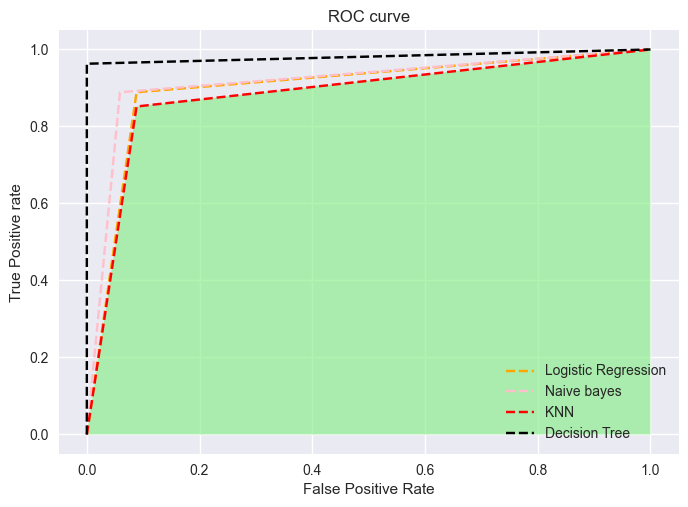

In [67]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_gnb)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_knn_pred)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_DT_pred)


plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='pink', label='Naive bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Decision Tree')
plt.fill_between(fpr3, tpr3, facecolor='lightgreen', alpha=0.7)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();